In [18]:
import psycopg2

# Establecer la conexión con la base de datos
engine = psycopg2.connect(
    dbname="icfes",
    user="postgres",
    password="Proyecto3",
    host="proyecto3-ssc.ccesjqcligmw.us-east-1.rds.amazonaws.com",
    port='5432'
)
cursor = engine.cursor()

# Consulta para contar el número total de registros en la tabla "Estudiantes"
query_count = "SELECT COUNT(*) FROM icfes;"
cursor.execute(query_count)
result_count = cursor.fetchone()
print("Número total de registros en la tabla:", result_count[0])

Número total de registros en la tabla: 25651


In [12]:
import pandas as pd

# Consulta SQL
consulta1 = """
SELECT
        Bilingue AS Colegio_Bilingue,
        Puntaje_Ingles AS Rango_Puntaje,
        COUNT(*) AS Cantidad_Estudiantes
    FROM icfes
    GROUP BY Colegio_Bilingue, Rango_Puntaje
    ORDER BY Colegio_Bilingue, Rango_Puntaje;
"""

cursor.execute(consulta1)
graf1 = cursor.fetchall

# Ejecutar la consulta y obtener los resultados en un DataFrame
df = pd.read_sql_query(consulta1, engine)
df



C:\Users\Personal\AppData\Local\Temp\ipykernel_13344\634289702.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(consulta1, engine)


,colegio_bilingue,rango_puntaje,cantidad_estudiantes
0,0,1,22
1,0,2,7443
2,0,3,13355
3,0,4,4012
4,0,5,251
5,1,1,6
6,1,2,188
7,1,3,292
8,1,4,70
9,1,5,12


   colegio_bilingue  rango_puntaje  cantidad_estudiantes
0                 0              1                    22
1                 0              2                  7443
2                 0              3                 13355
3                 0              4                  4012
4                 0              5                   251
5                 1              1                     6
6                 1              2                   188
7                 1              3                   292
8                 1              4                    70
9                 1              5                    12
Index(['colegio_bilingue', 'rango_puntaje', 'cantidad_estudiantes'], dtype='object')


C:\Users\Personal\AppData\Local\Temp\ipykernel_13344\562547749.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


NameError: name 'plt' is not defined

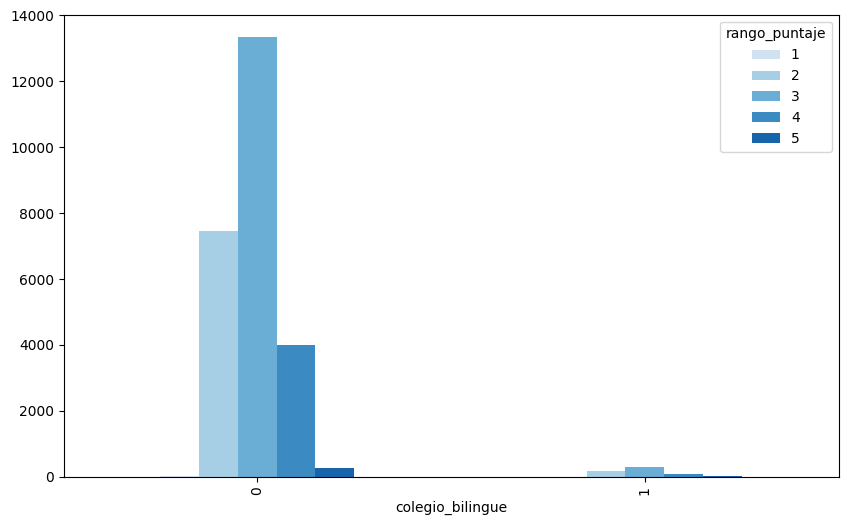

In [13]:
import sqlite3
import pandas as pd

# Ejecutar la consulta SQL
query = """
    SELECT
        Bilingue AS Colegio_Bilingue,
        Puntaje_Ingles AS Rango_Puntaje,
        COUNT(*) AS Cantidad_Estudiantes
    FROM icfes
    GROUP BY Colegio_Bilingue, Rango_Puntaje
    ORDER BY Colegio_Bilingue, Rango_Puntaje;
"""
cursor.execute(query)

# Obtener los resultados en un DataFrame
columns = [col[0] for col in cursor.description]
resultados_df = pd.DataFrame(cursor.fetchall(), columns=columns)
print(resultados_df)
print(resultados_df.columns)

import matplotlib.cm as cm
import numpy as np

# Obtener una paleta de colores de azul
cmap = cm.get_cmap('Blues')

# Definir el rango de tonos de azul que quieres usar
blue_tones = cmap(np.linspace(0.2, 0.8, 5))

# Agrupar los datos por colegio_bilingue y rango_puntaje
ax = resultados_df.pivot(index='colegio_bilingue', columns='rango_puntaje', values='cantidad_estudiantes').plot(kind='bar', figsize=(10, 6), edgecolor='none', color=blue_tones)

# Configuración del gráfico
plt.xlabel('Colegio Bilingue')
plt.ylabel('Cantidad de Estudiantes (escala symlog)')
plt.title('Cantidad de Estudiantes por Rango de Puntaje y Tipo de Colegio')
plt.legend(title='Rango de Puntaje')

# Aplicar escala symlog al eje y
plt.yscale('symlog')

# Quitar bordes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.show()

In [22]:
import pandas as pd
import psycopg2

# Establecer la conexión con la base de datos
engine = psycopg2.connect(
    dbname="icfes",
    user="postgres",
    password="Proyecto3",
    host="proyecto3-ssc.ccesjqcligmw.us-east-1.rds.amazonaws.com",
    port='5432'
)
cursor = engine.cursor()

# Consulta SQL
consulta2 = """
     SELECT
        Ubicacion,
        SUM(Puntaje_Global) AS Estudiantes_Arriba,
        COUNT(*) - SUM(Puntaje_Global) AS Estudiantes_Abajo
    FROM icfes
    GROUP BY ubicacion;
"""

cursor.execute(consulta2)
graf1 = cursor.fetchall()  # Asegúrate de invocar la función fetchall()

# Ejecutar la consulta y obtener los resultados en un DataFrame
df = pd.read_sql_query(consulta2, engine)
df


C:\Users\Personal\AppData\Local\Temp\ipykernel_13344\3836634760.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(consulta2, engine)


,ubicacion,estudiantes_arriba,estudiantes_abajo
0,0,8,4168
1,1,573,20902


In [23]:
import pandas as pd
import psycopg2

# Establecer la conexión con la base de datos
engine = psycopg2.connect(
    dbname="icfes",
    user="postgres",
    password="Proyecto3",
    host="proyecto3-ssc.ccesjqcligmw.us-east-1.rds.amazonaws.com",
    port='5432'
)
cursor = engine.cursor()

# Consulta SQL
consulta2 = """
      SELECT
        Internet,
        SUM(Puntaje_Global) AS Estudiantes_Arriba,
        COUNT(*) - SUM(Puntaje_Global) AS Estudiantes_Abajo
    FROM icfes
    GROUP BY Internet;

"""

cursor.execute(consulta2)
graf1 = cursor.fetchall()  # Asegúrate de invocar la función fetchall()

# Ejecutar la consulta y obtener los resultados en un DataFrame
df = pd.read_sql_query(consulta2, engine)
df


C:\Users\Personal\AppData\Local\Temp\ipykernel_13344\516458620.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(consulta2, engine)


,internet,estudiantes_arriba,estudiantes_abajo
0,0,20,7136
1,1,561,17934
